In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
from sklearn import svm, datasets
#plt.style.use('ggplot')
#plt.figure(figsize=(6, 5))
 
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'species']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

X1 = df.iloc[:,2:4][50:].values
y1 = np.where(df.iloc[:,4][50:].values == 'Iris-versicolor', -1 ,1)

X = df.iloc[:,0:4][50:].values
y = df.iloc[:,4][50:].values
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X1, y1)
h = .02  

titles = ['SVC with linear kernel',
          'SVD applied']
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])


0.95


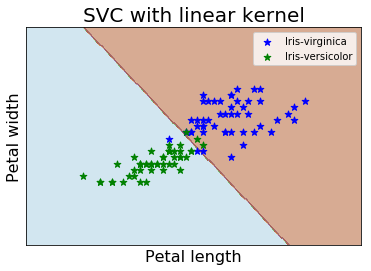

In [11]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
print(svc.score(X1,y1))
# Plot also the training points
#plt.scatter(X1[:, 0], X1[:, 1], c=y1 ,marker='*', cmap=plt.cm.Paired)
#for labels, columns in zip(('Iris-versicolor', 'Iris-virginica'),('green', 'blue')):
#    plt.scatter(X1[y==labels, 0],X1[y==labels, 1],label=labels,c=columns,marker='*', s=50)
for labels, columns in zip(('Iris-virginica', 'Iris-versicolor'),('blue', 'green')):
    plt.scatter(X1[y==labels, 0],X1[y==labels, 1],label=labels,c=columns,marker='*', s=50)
        
plt.xlabel('Petal length',fontsize=16)
plt.ylabel('Petal width',fontsize=16)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.legend(loc='best')
plt.title(titles[0], fontdict={'fontsize': 20, 'fontweight': 'medium'})

plt.show()


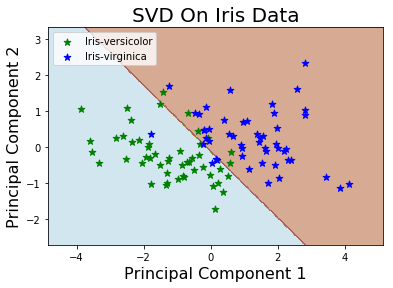

In [12]:


X_scaled = StandardScaler().fit_transform(X)
 
svd = TruncatedSVD(n_components=2)
Y_fitted = svd.fit_transform(X_scaled)
#print(Y_fitted)
#print(X_scaled) 
x_min, x_max = Y_fitted[:, 0].min() - 1, Y_fitted[:, 0].max() + 1
y_min, y_max = Y_fitted[:, 1].min() - 1, Y_fitted[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
svc = svm.SVC(kernel='linear', C=C).fit(Y_fitted, y1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.5)
for labels, columns in zip(('Iris-versicolor', 'Iris-virginica'),('green', 'blue')):
    plt.scatter(Y_fitted[y==labels, 0],Y_fitted[y==labels, 1],label=labels,c=columns,marker='*', s=50)
    
plt.xlabel('Principal Component 1', fontsize=16)
plt.ylabel('Principal Component 2', fontsize=16)
plt.legend(loc='best')
plt.title("SVD On Iris Data", fontsize=20)
plt.show()


In [13]:

print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.cumsum())
print(svd.explained_variance_)
print(svd.components_)
print(svd.singular_values_)
print(svc.score(Y_fitted,y1))

[0.7394778  0.13877791]
[0.7394778  0.87825571]
[2.9579112  0.55511165]
[[ 0.5071303   0.43474966  0.54369524  0.5081408 ]
 [ 0.22061124 -0.88844771  0.37958719  0.13380926]]
[17.19857901  7.45058153]
0.89
